In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
screenpath = "/content/drive/MyDrive/modified_screen_time.csv"
energypath = "/content/drive/MyDrive/modified_active_energy.csv"

screentime_df = pd.read_csv(screenpath)
energy_df = pd.read_csv(energypath)

In [8]:
screentime_df['date'] = pd.to_datetime(screentime_df['date'])
energy_df['date'] = pd.to_datetime(energy_df['date'])

In [10]:
merged_df = pd.merge(screentime_df, energy_df, on='date', how='inner')

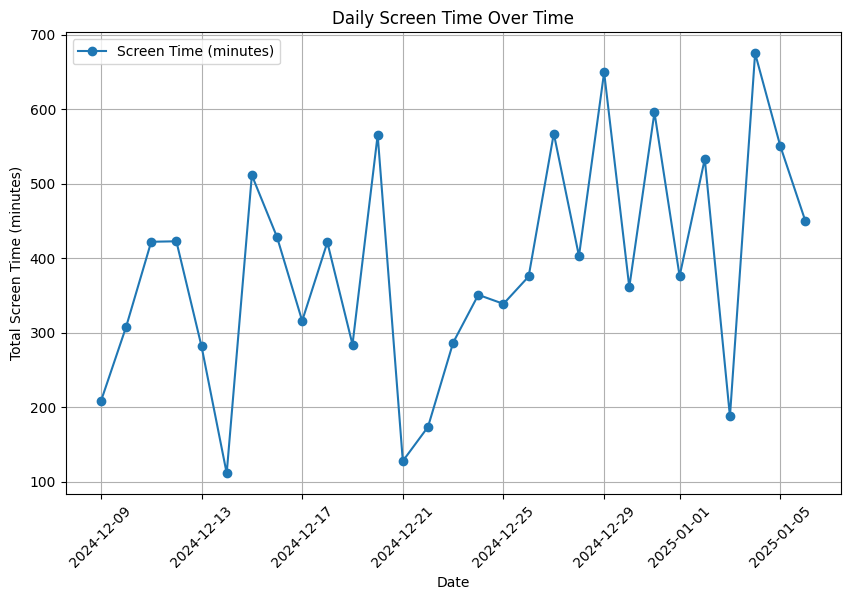

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(screentime_df['date'], screentime_df['total_screen_time_minutes'], marker='o', linestyle='-', label='Screen Time (minutes)')
plt.title('Daily Screen Time Over Time')
plt.xlabel('Date')
plt.ylabel('Total Screen Time (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


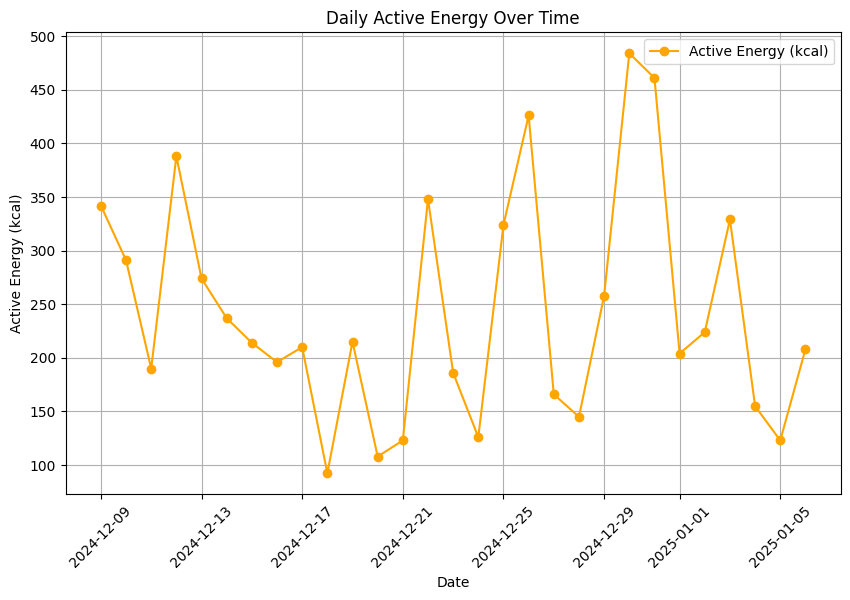

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(energy_df['date'], energy_df['active_energy_kcal'], marker='o', color='orange', label='Active Energy (kcal)')
plt.title('Daily Active Energy Over Time')
plt.xlabel('Date')
plt.ylabel('Active Energy (kcal)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


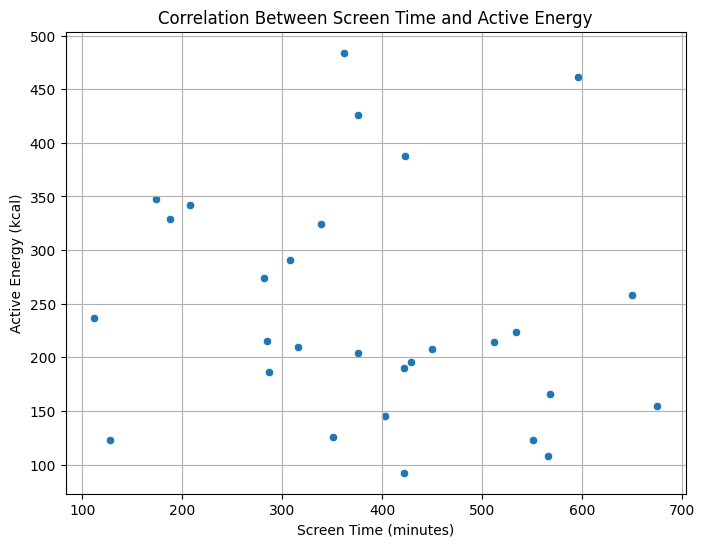

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_screen_time_minutes', y='active_energy_kcal', data=merged_df)
plt.title('Correlation Between Screen Time and Active Energy')
plt.xlabel('Screen Time (minutes)')
plt.ylabel('Active Energy (kcal)')
plt.grid(True)
plt.show()

In [14]:
correlation = merged_df[['total_screen_time_minutes', 'active_energy_kcal']].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                           total_screen_time_minutes  active_energy_kcal
total_screen_time_minutes                   1.000000           -0.167392
active_energy_kcal                         -0.167392            1.000000


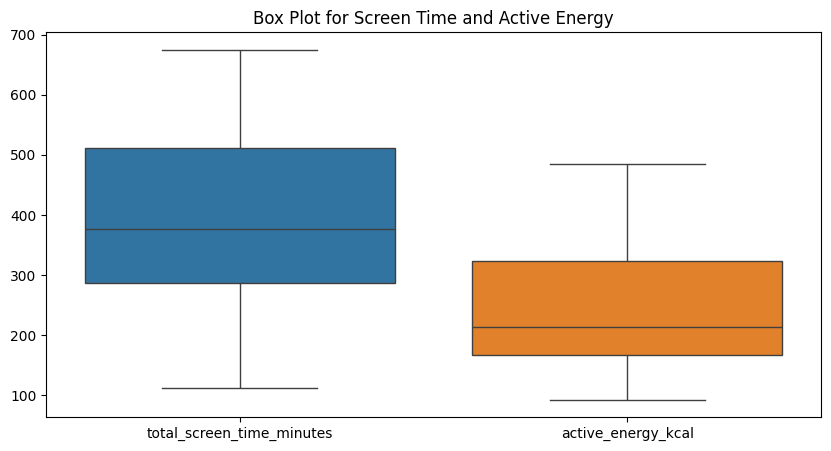

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_df[['total_screen_time_minutes', 'active_energy_kcal']])
plt.title('Box Plot for Screen Time and Active Energy')
plt.show()

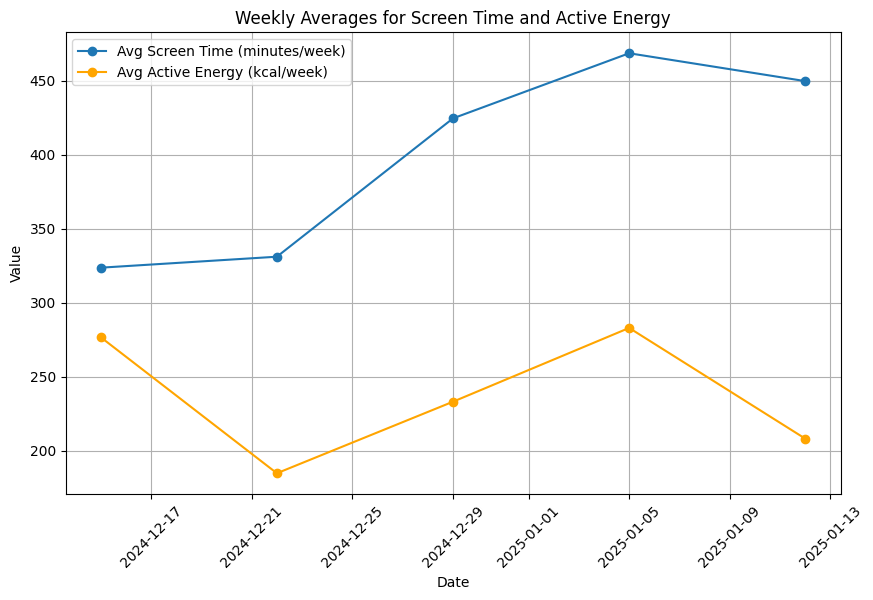

In [16]:
# Group the data by week and compute the mean for each week
weekly_avg = merged_df.resample('W', on='date').mean()

# Reset index to make the date column available for plotting
weekly_avg.reset_index(inplace=True)

# Plot the weekly averages
plt.figure(figsize=(10, 6))
plt.plot(weekly_avg['date'], weekly_avg['total_screen_time_minutes'], marker='o', label='Avg Screen Time (minutes/week)')
plt.plot(weekly_avg['date'], weekly_avg['active_energy_kcal'], marker='o', label='Avg Active Energy (kcal/week)', color='orange')
plt.title('Weekly Averages for Screen Time and Active Energy')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

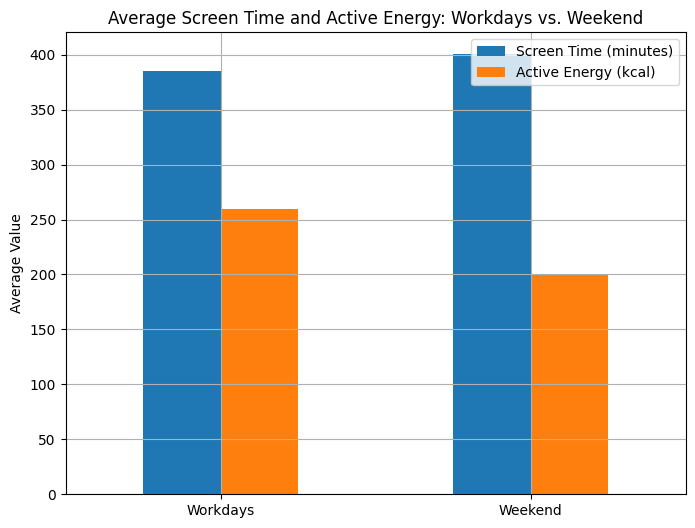

In [17]:
# Add a column for day of the week
merged_df['day_of_week'] = merged_df['date'].dt.day_name()

# Classify workdays and weekends
merged_df['is_weekend'] = merged_df['day_of_week'].isin(['Saturday', 'Sunday'])

# Calculate average screen time and active energy for workdays vs. weekends
avg_by_day_type = merged_df.groupby('is_weekend')[['total_screen_time_minutes', 'active_energy_kcal']].mean()
avg_by_day_type.index = ['Workdays', 'Weekend']  # Rename the index for better readability

# Plot a bar chart for comparison
avg_by_day_type.plot(kind='bar', figsize=(8, 6), rot=0)
plt.title('Average Screen Time and Active Energy: Workdays vs. Weekend')
plt.ylabel('Average Value')
plt.legend(['Screen Time (minutes)', 'Active Energy (kcal)'])
plt.grid(True)
plt.show()


In [18]:
from scipy.stats import pearsonr, spearmanr

# Extract screen time and active energy columns
screen_time = merged_df['total_screen_time_minutes']
active_energy = merged_df['active_energy_kcal']

# Perform Pearson correlation test
pearson_corr, pearson_pval = pearsonr(screen_time, active_energy)
print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {pearson_pval:.3f}")

# Perform Spearman correlation test
spearman_corr, spearman_pval = spearmanr(screen_time, active_energy)
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_pval:.3f}")


Pearson Correlation: -0.167, p-value: 0.385
Spearman Correlation: -0.251, p-value: 0.189


In [19]:
from scipy.stats import pearsonr, spearmanr

# Add a column for day of the week
merged_df['day_of_week'] = merged_df['date'].dt.day_name()

# Classify workdays and weekends
merged_df['is_weekend'] = merged_df['day_of_week'].isin(['Saturday', 'Sunday'])

# Separate the data into workdays and weekends
workdays_df = merged_df[~merged_df['is_weekend']]
weekends_df = merged_df[merged_df['is_weekend']]

# Perform correlation analysis for workdays
print("**Workdays Correlation**")
workdays_screen_time = workdays_df['total_screen_time_minutes']
workdays_active_energy = workdays_df['active_energy_kcal']
pearson_corr_workdays, pearson_pval_workdays = pearsonr(workdays_screen_time, workdays_active_energy)
spearman_corr_workdays, spearman_pval_workdays = spearmanr(workdays_screen_time, workdays_active_energy)
print(f"Pearson Correlation (Workdays): {pearson_corr_workdays:.3f}, p-value: {pearson_pval_workdays:.3f}")
print(f"Spearman Correlation (Workdays): {spearman_corr_workdays:.3f}, p-value: {spearman_pval_workdays:.3f}")

# Perform correlation analysis for weekends
print("\n**Weekends Correlation**")
weekends_screen_time = weekends_df['total_screen_time_minutes']
weekends_active_energy = weekends_df['active_energy_kcal']
pearson_corr_weekends, pearson_pval_weekends = pearsonr(weekends_screen_time, weekends_active_energy)
spearman_corr_weekends, spearman_pval_weekends = spearmanr(weekends_screen_time, weekends_active_energy)
print(f"Pearson Correlation (Weekends): {pearson_corr_weekends:.3f}, p-value: {pearson_pval_weekends:.3f}")
print(f"Spearman Correlation (Weekends): {spearman_corr_weekends:.3f}, p-value: {spearman_pval_weekends:.3f}")


**Workdays Correlation**
Pearson Correlation (Workdays): -0.152, p-value: 0.510
Spearman Correlation (Workdays): -0.235, p-value: 0.305

**Weekends Correlation**
Pearson Correlation (Weekends): -0.243, p-value: 0.563
Spearman Correlation (Weekends): -0.048, p-value: 0.910
